---

<!-- <a href="https://github.com/rraadd88/roux/blob/master/examples/roux_vizi_select.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>
 -->
 
## 📈✨📈 Interactive selection.


    pip install altair vega_datasets

In [1]:
# | default_exp select

In [2]:
# | export
import logging
import altair as alt
    
def plotsi_image(
    data,
    x : str,
    y : str,
    col_id : str,
    col_url: str,
    figsize=[
        400,
        200,
    ],
    kws_img={},
    **kws_sca,#=dict(size=200),
    ):
    ## to avoid interference
    col_x=x
    del x
    col_y=y
    del y    

    img_local_paths=data.query(f"~`{col_url}`.str.startswith('http')")[col_url].unique().tolist()
    
    if len(img_local_paths)>0:
        logging.warning(f"{len(img_local_paths)} local paths found; converting to base64 ..")
        from roux.viz.io import to_data
        data=data.assign(
            **{
            col_url:lambda df: df[col_url].map({p:to_data(p) for p in img_local_paths}),
        }
        )
    
    row=data.iloc[0,:]
    
    # Selection for interactivity
    selection_point = alt.selection_point(
        fields=[
            col_id
        ],
        # default
        value=[{col_id:row[col_id]}],
    )
    
    points = (
        alt.Chart(data)
        .mark_circle(
            **kws_sca
        )
        .encode(
            x=col_x,
            y=col_y,
            tooltip=col_id,
            color=alt.condition(selection_point, if_true=alt.value('blue'), if_false=alt.value('gray'),legend=None),
        )
        .properties(
            width=figsize[0]//2,
            height=figsize[1],
        )
        .add_params(
            # brush
            selection_point
        )
    )

    
    imgs = (
        alt.Chart(data)
        .mark_image(
            **kws_img
        )
        .encode(
            url=col_url
        )
        .properties(
            width=figsize[0]//2,
            height=figsize[1],
        )
        .facet(
            alt.Facet(col_url, title='', header=alt.Header(labelFontSize=0))
        )
        .transform_filter(
            selection_point
            # brush
        )
    )
    
    return (
        (points | imgs)
        .configure_axis(
            grid=False
        )
        .configure_view(
            stroke=None
        )
    )

**Demo data**

In [3]:
import pandas as pd
data = pd.DataFrame.from_records(
    [
        {'a': 2, 'b': 2, 'image': 'https://avatars.githubusercontent.com/u/11796929?s=200&v=4',
            'label':'avatar',
        },
        {'a': 1, 'b': 1, 'image': 'https://altair-viz.github.io/_static/altair-logo-light.png',
            'label':'altair',
        },
    ]
)
data

,a,b,image,label
0,2,2,https://avatars.githubusercontent.com/u/117969...,avatar
1,1,1,https://altair-viz.github.io/_static/altair-lo...,altair


### URLs

In [4]:
#from roux.vizi.select import plotsi_image
plotsi_image(
    data,
    x='a',
    y='b',
    col_id='label',
    col_url='image',
    size=100,
    )

alt.HConcatChart(...)

### Local paths

In [5]:
# from glob import glob

# glob('outputs/roux_viz_scatter/*png')

In [6]:
data['image']=['outputs/roux_viz_scatter/plot_scatter.png',
 'outputs/roux_viz_scatter/plot_volcano_marked.png',
 # 'outputs/roux_viz_scatter/plot_volcano_out_of_bounds.png'
              ]

alt.HConcatChart(...)
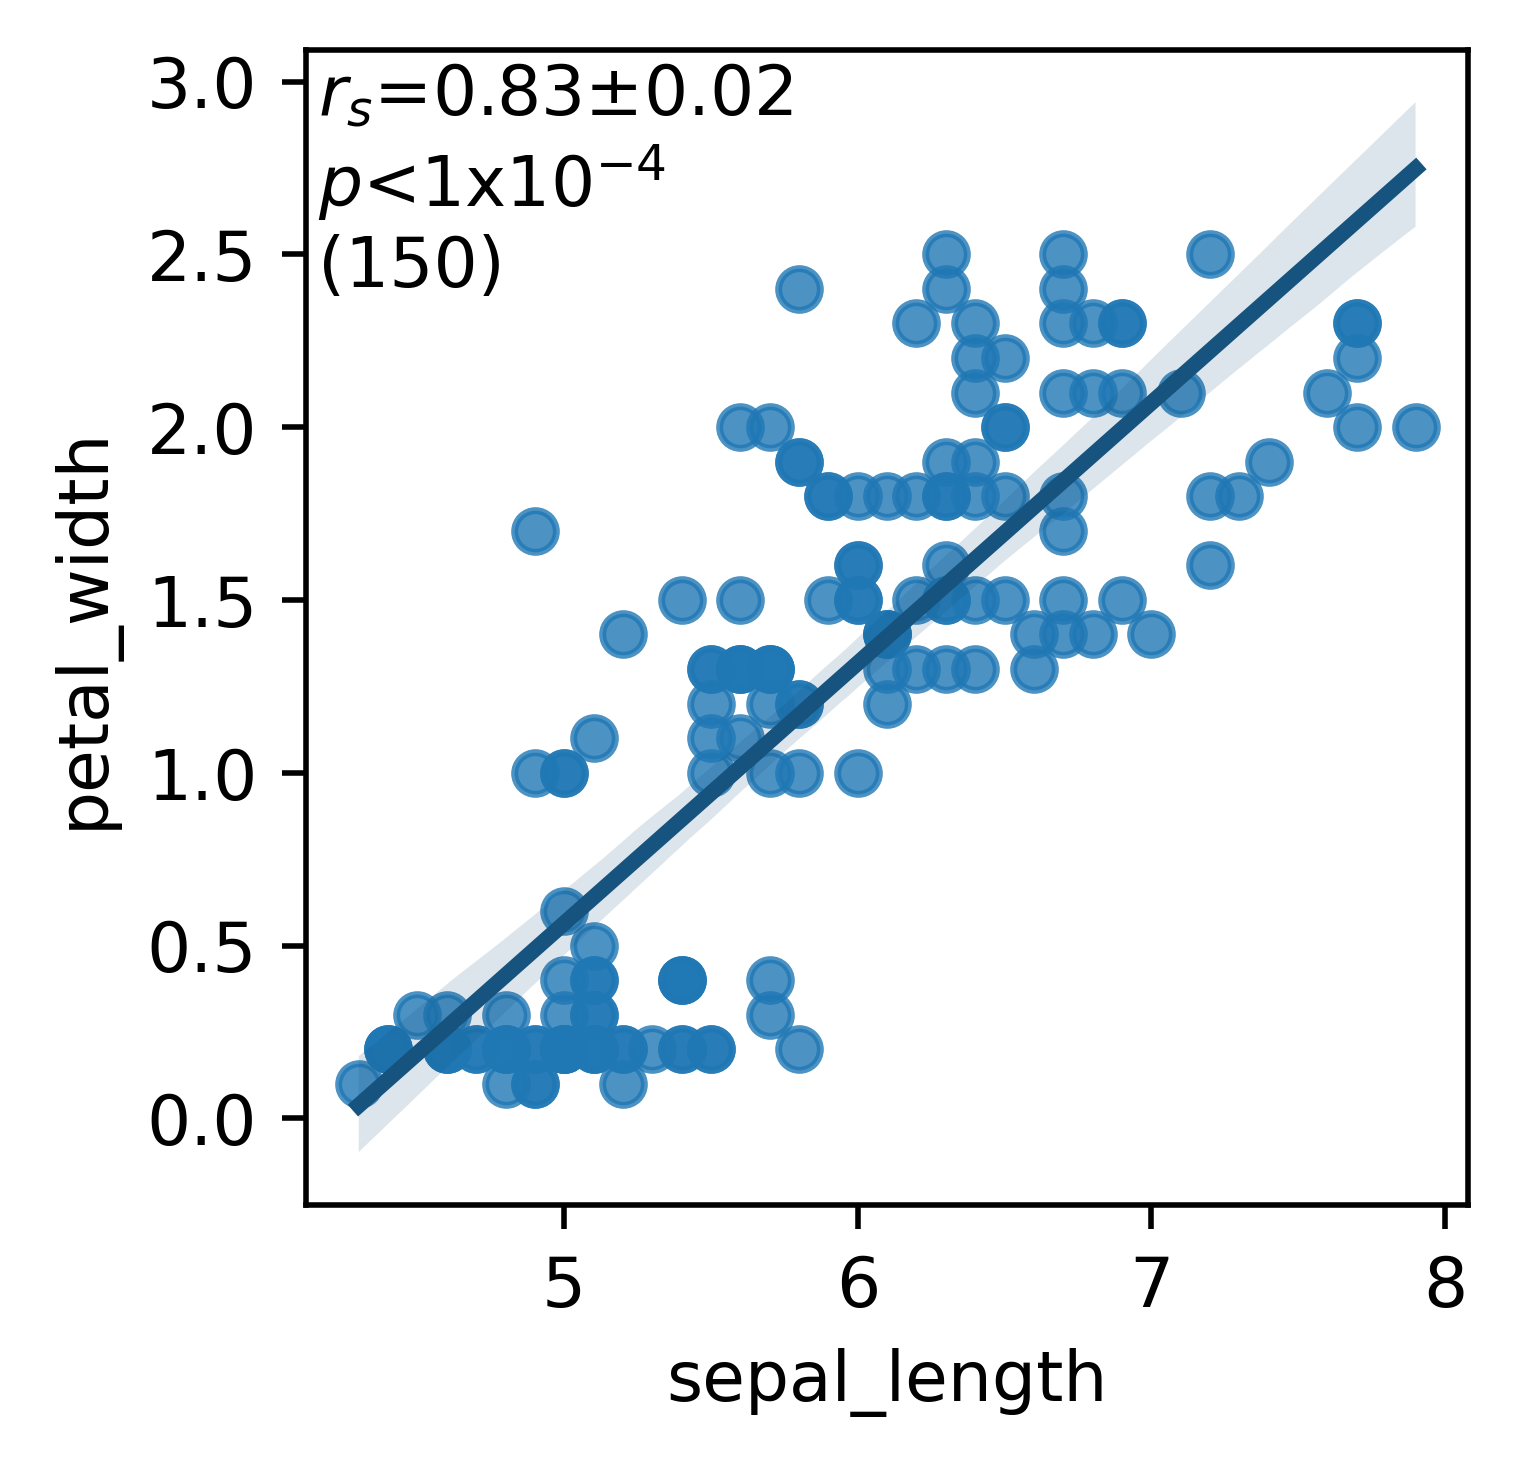
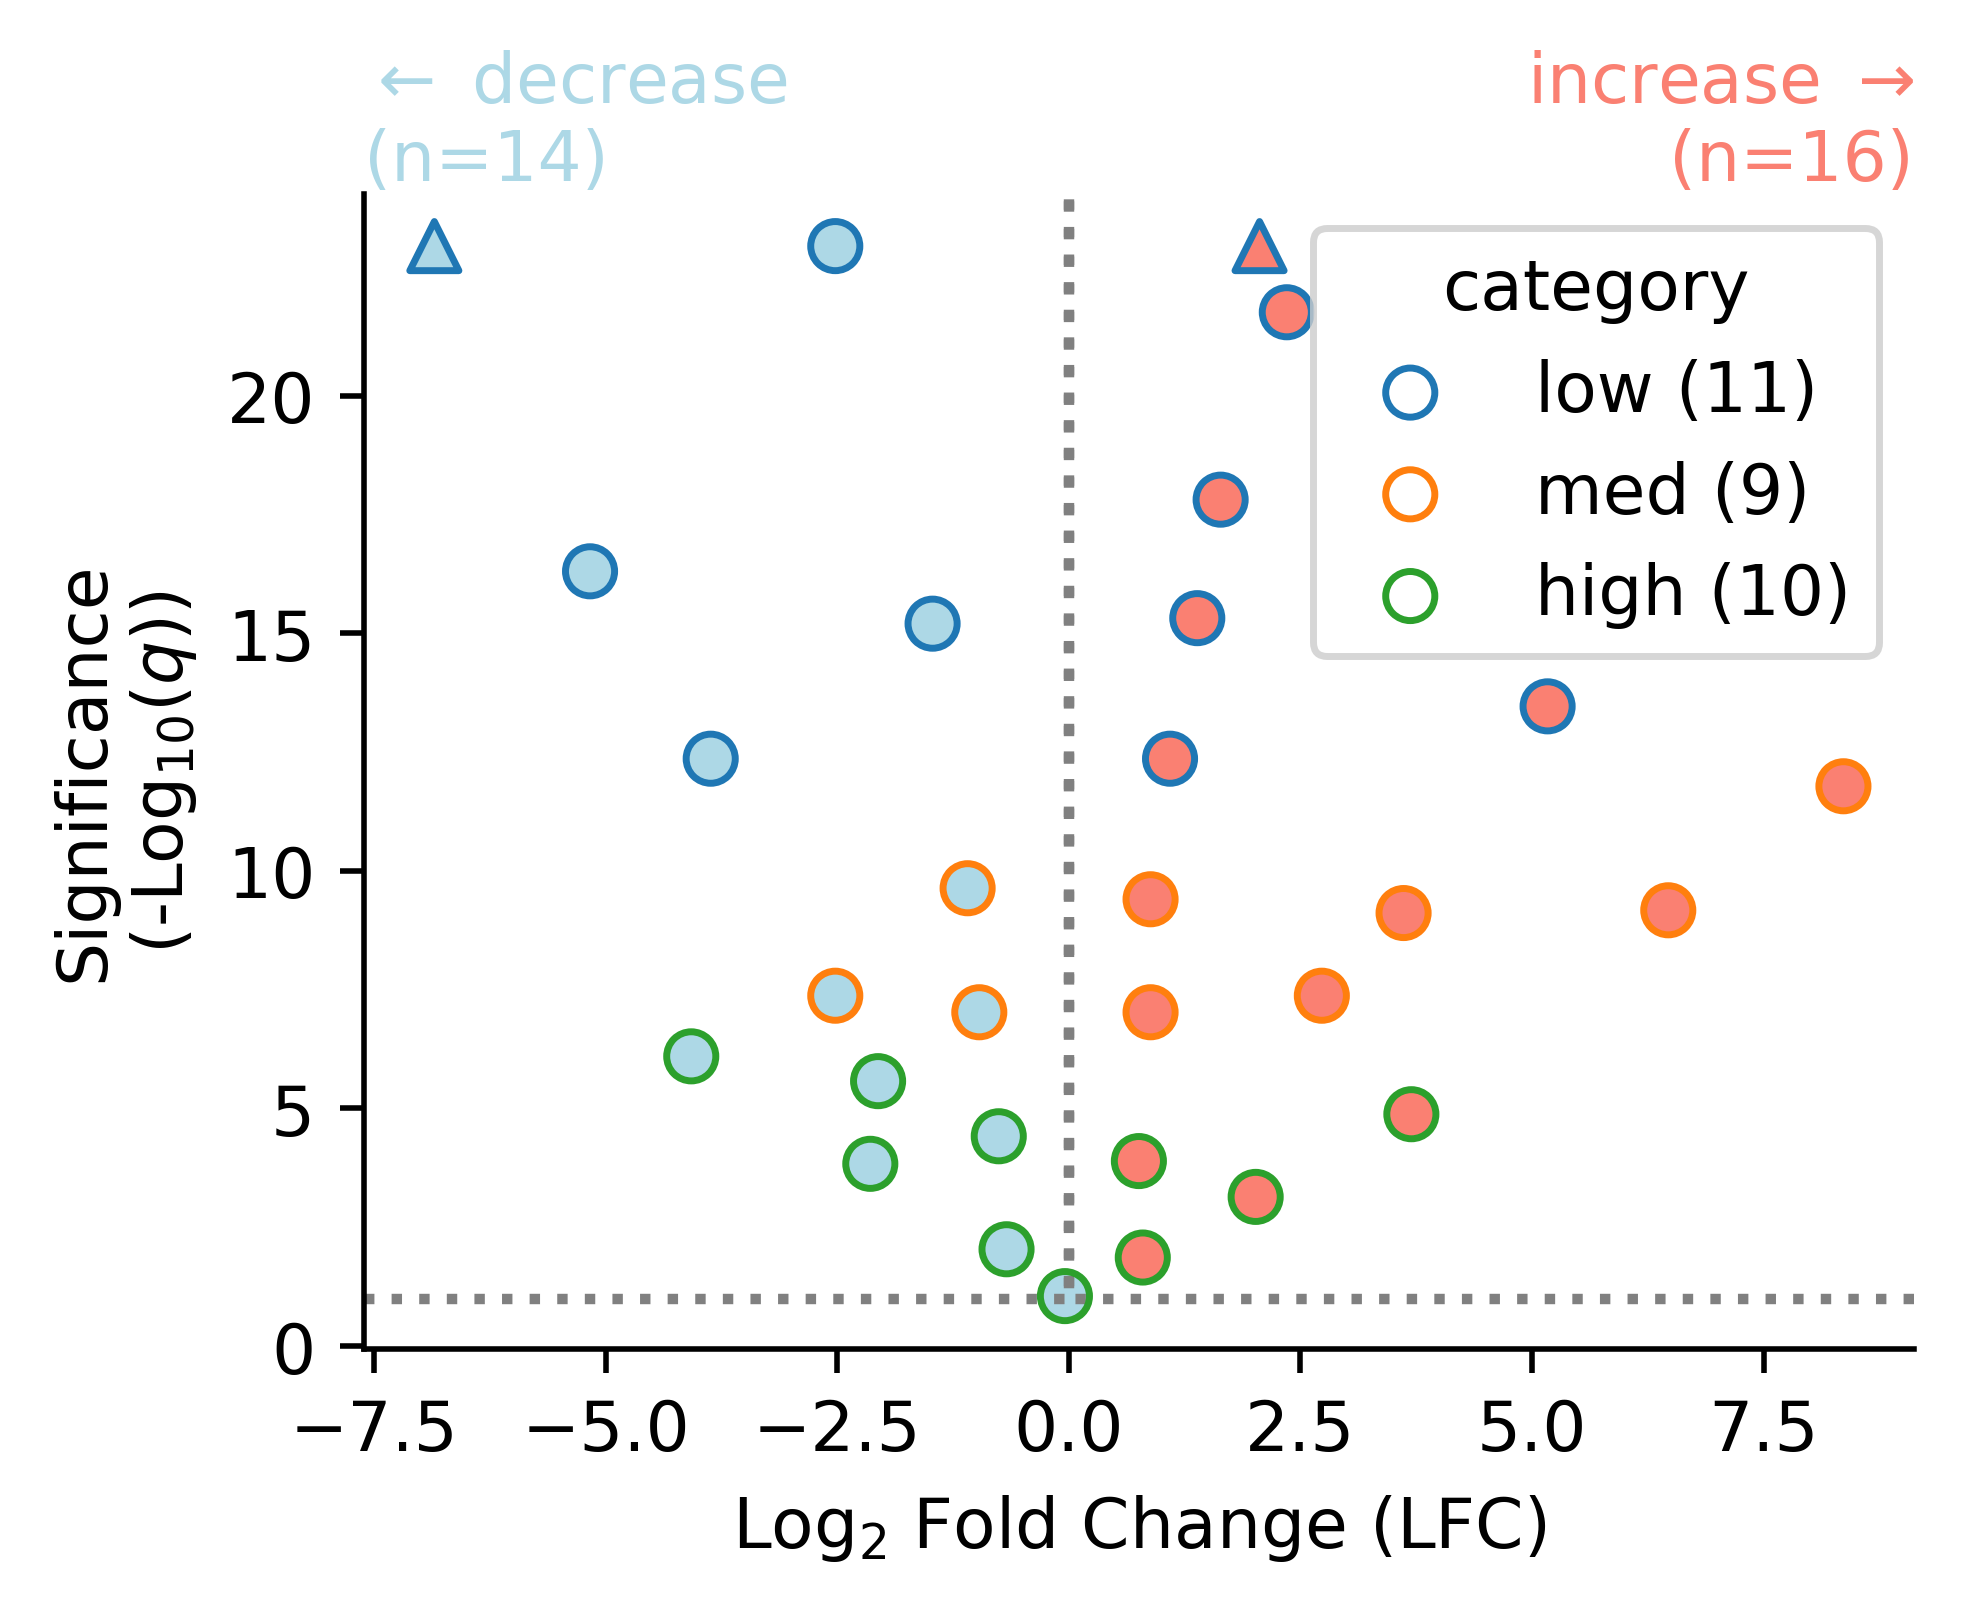

In [7]:
#from roux.vizi.select import plotsi_image
plotsi_image(
    data,
    x='a',
    y='b',
    col_id='label',
    col_url='image',
    size=100,
    )

**Outputs**

In [8]:
import nbdev
nbdev.export.nb_export(
    'roux_vizi_select.ipynb',
    lib_path='../roux/vizi/'
)

### Documentation
[`roux.vizi.select`](https://github.com/rraadd88/roux#module-rouxviziselect)